/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



AIC:	 4009.7457855882044
BIC:	 4023.9100626905765
RMSE:	 10.435822183613066


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 9 (	) missing from font(s) DejaVu Sans.



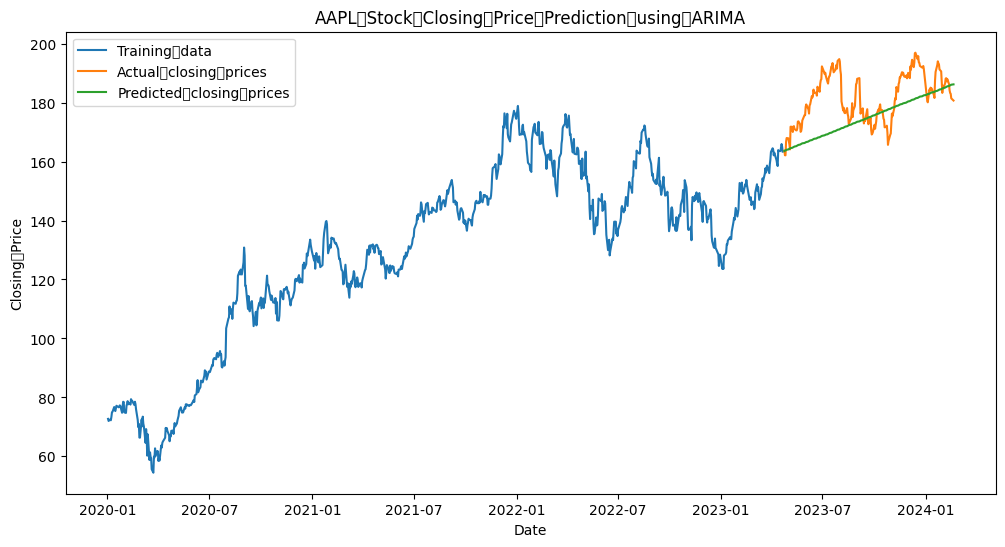

In [31]:
import	pandas	as	pd
import	numpy	as	np
import	matplotlib.pyplot	as	plt
from	pandas_datareader	import	data	as	pdr
import	yfinance	as	yf
from	statsmodels.tsa.arima.model	import	ARIMA
from	sklearn.metrics	import	mean_squared_error
from	math	import	sqrt
#	Set	up	Yahoo	Finance	data	source
#yf.pdr_override()
#	Get	historical	stock	data
symbol	=	"AAPL"
start_date	=	"2020-01-01"
end_date	=	"2024-02-21"
stock_data = yf.Ticker('AAPL').history(start=start_date, end=end_date)[['Close', 'Open', 'High', 'Volume']]
# stock_data	=	yf.Ticker('AAPL').history(period='1y')[['Close',	'Open',	'High',	'Volume']]
#	Extract	closing	prices
closing_prices	=	stock_data["Close"]
#	Divide	data	into	training	and	testing	sets
train_data	=	closing_prices[:int(len(closing_prices)	*	0.8)]
test_data	=	closing_prices[int(len(closing_prices)	*	0.8):]
#	Train	ARIMA	model
model	=	ARIMA(train_data,	order=(1,	2,	1))
model_fit	=	model.fit()
#	Output	AIC	and	BIC	values
print("AIC:	",	model_fit.aic)
print("BIC:	",	model_fit.bic)
#	Forecast	stock	prices	with	ARIMA	model
predictions	=	model_fit.forecast(steps=len(test_data))
#	Compute	root	mean	squared	error	(RMSE)
rmse	=	sqrt(mean_squared_error(test_data,	predictions))
print("RMSE:	",	rmse)
#	Display	actual	vs.	predicted	closing	prices
plt.figure(figsize=(12,	6))
plt.plot(train_data,	label="Training	data")
plt.plot(test_data,	label="Actual	closing	prices")
plt.plot(test_data.index,	predictions,	label="Predicted	closing	prices")
plt.xlabel("Date")
plt.ylabel("Closing	Price")
plt.title(f"{symbol}	Stock	Closing	Price	Prediction	using	ARIMA")
plt.legend()
plt.show()

Optimal	ARIMA	order:	(4, 1, 2)
AIC:	 4002.702908509182
BIC:	 4035.769735594931
RMSE:	 19.770566034249356


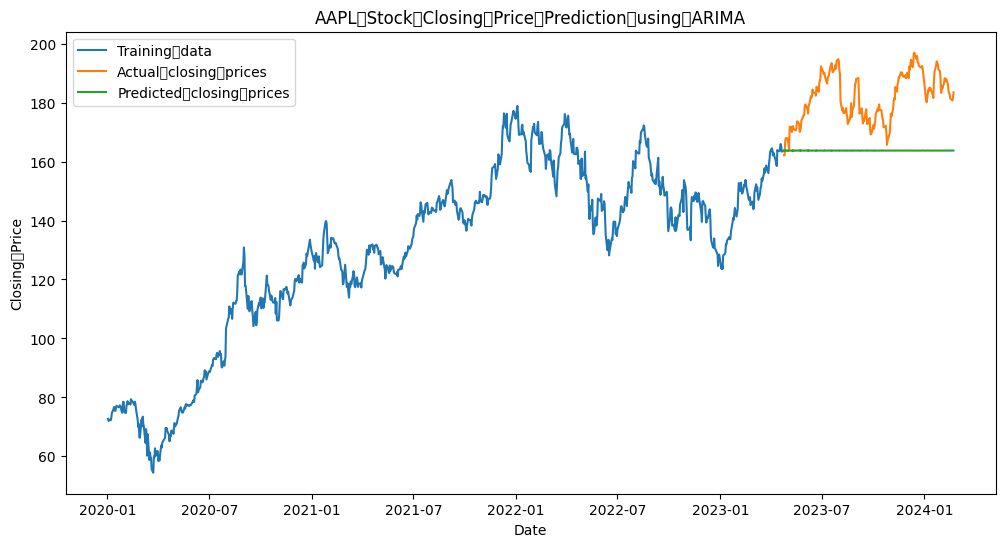

In [32]:
import	pandas	as	pd
import	numpy	as	np
import	matplotlib.pyplot	as	plt
from	pandas_datareader	import	data	as	pdr
import	yfinance	as	yf
from	statsmodels.tsa.arima.model	import	ARIMA
from	sklearn.metrics	import	mean_squared_error
from	math	import	sqrt
import	itertools
import	warnings
#	Ignore	warnings
warnings.filterwarnings("ignore")
#	Set	up	Yahoo	Finance	data	source
#	Get	historical	stock	data
symbol	=	"AAPL"
start_date	=	"2020-01-01"
end_date	=	"2024-02-23"
stock_data = yf.Ticker('AAPL').history(start=start_date, end=end_date)[['Close', 'Open', 'High', 'Volume']]
#	Extract	closing	prices
closing_prices	=	stock_data["Close"]
#	Divide	data	into	training	and	testing	sets
train_data	=	closing_prices[:int(len(closing_prices)	*	0.8)]
test_data	=	closing_prices[int(len(closing_prices)	*	0.8):]
 #	Determine	optimal	ARIMA	parameters	with	grid	search
p_values	=	range(0,	5)
d_values	=	range(0,	5)
q_values	=	range(0,	5)
pdq_combinations	=	list(itertools.product(p_values,	d_values,	q_values))
best_aic	=	float("inf")
best_order	=	None
best_model	=	None
#	Iterate	through	possible	parameter	combinations
for	order	in	pdq_combinations:
  try:
    model	=	ARIMA(train_data,	order=order)
    model_fit	=	model.fit()
    if	model_fit.aic	<	best_aic:
      best_aic	=	model_fit.aic
      best_order	=	order
      best_model	=	model_fit
  except	Exception	as	e:
    print(f"Error	fitting	ARIMA	model	with	order	{order}")

print(f"Optimal	ARIMA	order:	{best_order}")
print("AIC:	",	best_aic)
print("BIC:	",	best_model.bic)
#	Forecast	stock	prices	using	optimal	ARIMA	model
predictions	=	best_model.forecast(steps=len(test_data))
#	Compute	root	mean	squared	error	(RMSE)
rmse	=	sqrt(mean_squared_error(test_data,	predictions))
print("RMSE:	",	rmse)
#	Display	actual	vs.	predicted	closing	prices
plt.figure(figsize=(12,	6))
plt.plot(train_data,	label="Training	data")
plt.plot(test_data,	label="Actual	closing	prices")
plt.plot(test_data.index,	predictions,	label="Predicted	closing	prices")
plt.xlabel("Date")
plt.ylabel("Closing	Price")
plt.title(f"{symbol}	Stock	Closing	Price	Prediction	using	ARIMA")
plt.legend()
plt.show()